In [133]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score
from scipy import stats


In [64]:
df=pd.read_csv(r"C:\Users\92331\Desktop\ML\single_variable_linear_regression\student-scores.csv")

In [93]:
df.head()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score             2000 non-null   int6

In [66]:
#Creating the sum of the scores of all subjects
score_col=[ i for i in df.columns if i.endswith("score")]
df["total_score"]=df[score_col].sum(axis=1)
print(df["total_score"])

0       574
1       640
2       605
3       551
4       521
       ... 
1995    558
1996    534
1997    578
1998    566
1999    617
Name: total_score, Length: 2000, dtype: int64


In [121]:
#Creating the X and the y
X=df.drop(columns=['math_score','history_score','physics_score','chemistry_score','biology_score','english_score','geography_score','email','first_name','last_name','career_aspiration','total_score'])
y=df['total_score']
print(X.columns.to_list())

['id', 'gender', 'part_time_job', 'absence_days', 'extracurricular_activities', 'weekly_self_study_hours']


In [128]:
#Spliting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [123]:
#Data preprocessing pipeline 
num_columns=X.select_dtypes(include='number').columns
cat_columns=X.select_dtypes(include=['object','category']).columns


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoding', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_columns),
    ('cat', cat_pipeline, cat_columns)
])


In [129]:
#full pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('lr', LinearRegression())
])


In [131]:
model.fit(X_train,y_train)

,steps,"[('preprocessor', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [132]:
#Pediction
y_pred=model.predict(X_test)

#Model Evaluation
def rmse(a,b) : return np.sqrt(mean_squared_error(a,b))
print("rmse :",rmse(y_test,y_pred))
print("r square value :",r2_score(y_test,y_pred))

rmse : 39.13242778084225
r square value : 0.2723297109694355


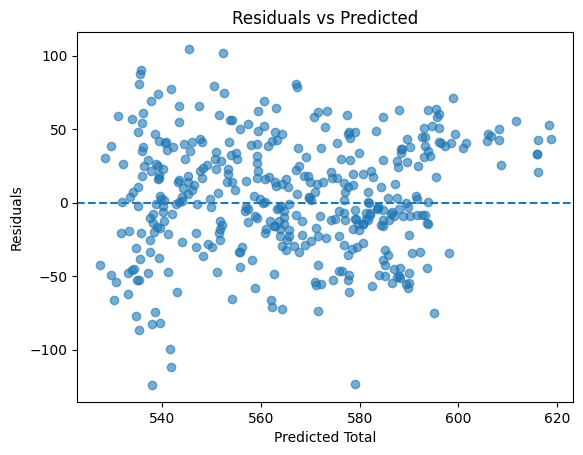

In [127]:
# ====== RESIDUAL PLOTS ======
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, linestyle='--')
plt.xlabel("Predicted Total")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

((array([-2.92336218, -2.63535913, -2.47295045, -2.35755533, -2.26698478,
         -2.19190181, -2.1274581 , -2.0708001 , -2.0201009 , -1.97411768,
         -1.93196517, -1.89298964, -1.85669409, -1.82269149, -1.79067433,
         -1.76039407, -1.73164687, -1.70426336, -1.67810123, -1.65303972,
         -1.62897542, -1.6058191 , -1.58349316, -1.56192972, -1.54106902,
         -1.52085818, -1.50125015, -1.48220291, -1.46367871, -1.44564358,
         -1.42806678, -1.41092042, -1.39417912, -1.37781969, -1.36182093,
         -1.34616333, -1.33082898, -1.31580134, -1.3010651 , -1.28660611,
         -1.2724112 , -1.25846816, -1.24476556, -1.23129278, -1.21803987,
         -1.20499751, -1.19215696, -1.17951003, -1.16704898, -1.15476657,
         -1.14265594, -1.13071061, -1.11892449, -1.10729178, -1.09580701,
         -1.08446499, -1.07326079, -1.06218972, -1.05124734, -1.0404294 ,
         -1.02973187, -1.01915091, -1.00868282, -0.99832412, -0.98807145,
         -0.97792161, -0.96787152, -0.

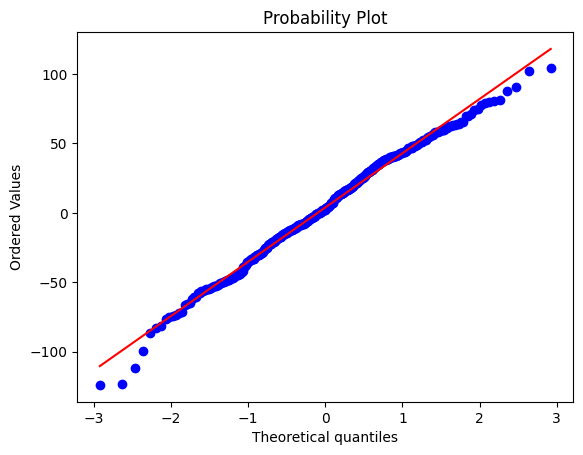

In [134]:
stats.probplot(residuals, dist="norm", plot=plt)


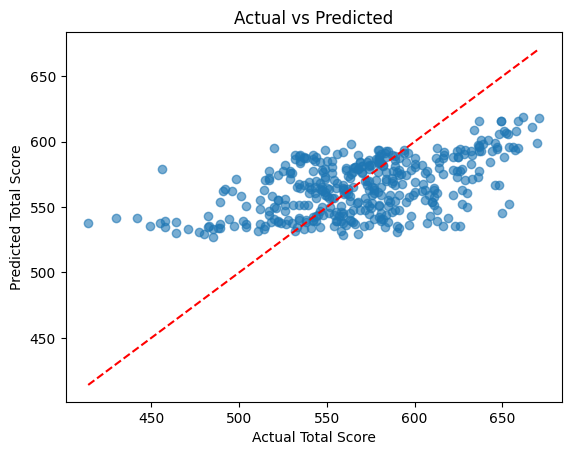

In [135]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Total Score")
plt.ylabel("Predicted Total Score")
plt.title("Actual vs Predicted")
plt.show()
